# Práctica 11: Agrupamiento de Datos.

El agrupamiento o "clustering" es la tarea de agrupar un conjunto de objetos de tal manera que los miembros del mismo grupo sean más similares, en algún sentido u otro. Es la tarea principal de la minería de datos exploratoria y es una técnica común en el análisis de datos estadísticos. Además es utilizada en múltiples campos como el aprendizaje automático, el reconocimiento de patrones, el análisis de imágenes, la búsqueda y recuperación de información.

El análisis de grupos no es en sí un algoritmo específico, se puede hacer el agrupamiento utilizando varios algoritmos que difieren significativamente en su idea de qué constituye un grupo y cómo encontrarlos eficientemente. 

En esta práctica se utilizaran datos diferentes a los que se han utilizado en prácticas anteriores, ya que estos son más sencillos de relacionar con grupos. Se trata de un csv sacado de la página de 'Kaggle' donde describen el genero, la raza, el nivel educativo de los padres, y las calificaciones de estudiantes, entre otras cosas. 

Lo primero que se realiza, al igual que en prácticas anteriores, es llamar el csv por medio de la herramienta de pandas.

In [29]:
import ssl
import pandas as pd
from sklearn import metrics
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import isnan, nan, take, where
import numpy as np
seed(42)

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
e = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/StudentsPerformance.csv")

Se tienen identificados los distintos elementos dentro del csv, por lo que se etiquetan con números para hacer más sencilla su manipulación.

In [30]:
e['race'] = pd.factorize(e.race)[0] + 1
e['gender'] = pd.factorize(e.race)[0] + 1
e['prep'] = pd.factorize(e.race)[0] + 1


In [31]:
e.head()

,gender,race,parental-ed,lunch,prep,math,read,write,prom
0,1,1,bachelor's degree,standard,1,72,72,74,72.666667
1,2,2,some college,standard,2,69,90,88,82.333333
2,1,1,master's degree,standard,1,90,95,93,92.666667
3,3,3,associate's degree,free/reduced,3,47,57,44,49.333333
4,2,2,some college,standard,2,76,78,75,76.333333


In [32]:
e['prom-int'] = e['prom'].apply(np.int64)
e.head()

,gender,race,parental-ed,lunch,prep,math,read,write,prom,prom-int
0,1,1,bachelor's degree,standard,1,72,72,74,72.666667,72
1,2,2,some college,standard,2,69,90,88,82.333333,82
2,1,1,master's degree,standard,1,90,95,93,92.666667,92
3,3,3,associate's degree,free/reduced,3,47,57,44,49.333333,49
4,2,2,some college,standard,2,76,78,75,76.333333,76


In [36]:
e['parental-ed'].unique()


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [40]:
e['parental-ed'] = pd.factorize(e.race)[0] + 1
e['lunch'] = pd.factorize(e.race)[0] + 1
e.head()

,gender,race,parental-ed,lunch,prep,math,read,write,prom,prom-int
0,1,1,1,1,1,72,72,74,72.666667,72
1,2,2,2,2,2,69,90,88,82.333333,82
2,1,1,1,1,1,90,95,93,92.666667,92
3,3,3,3,3,3,47,57,44,49.333333,49
4,2,2,2,2,2,76,78,75,76.333333,76


Una vez que se tienen los datos de manera más ordenada, se continua siguiendo los pasos dictados en la práctica de prueba para saber la relación que se tienen en los diferentes grupos. En este caso parece interesante saber si el nivel educativo de los padres tiene un papel importante para el resultado final del promedio en calificación del alumno. Se toman entonces como referencia la columna de 'parental-ed' y 'prom'.

274 Grupo 0
287 Grupo 1
439 Grupo 2


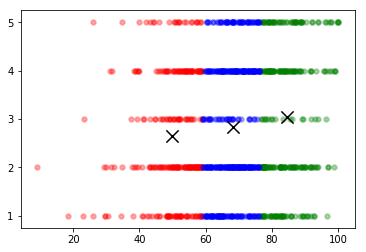

0.5100526730934494


In [91]:
keep = ['prom', 'parental-ed']
d = e.loc[:, keep]
x = d.values
k =3
m = KMeans(init = 'random', n_clusters = k, n_init = 10)
m.fit(x)
centroides = m.cluster_centers_
grupos = m.predict(x)
plt.figure(1)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)
colores = ['r', 'g', 'b']
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "Grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.3, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

Según la interpretación vista en la práctica de prueba de la Dra. Elisa, se puede concluir con la gráfica que el nivel de educación que tienen los padres influye un poco en la calificación final del alumno, ya que las calificaciones más altas parecen coincidir con el centroide que indica una educación arriba del promedio, mientras que se aprecia también que cuando la calificación disminuye, los centroides de la educación van moviendose a un nivel más bajo.

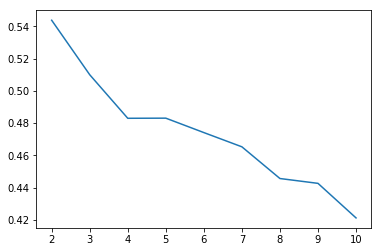

In [100]:
import ssl
import pandas as pd
from sklearn import metrics
from numpy.random import seed
import matplotlib.pyplot as plt
from numpy import isnan, nan, take, where
from sklearn.cluster import KMeans

ks = [k for k in range(2, 11)]
sil = []
for k in ks:
    m = KMeans(init = 'random', n_clusters = k, n_init = 2)
    m.fit(x)
    sil.append(metrics.silhouette_score(x, m.predict(x), metric='euclidean'))
plt.figure(1)
plt.plot(ks, sil)
plt.show()

100 integrantes en grupo 0
63 integrantes en grupo 1
57 integrantes en grupo 2
37 integrantes en grupo 3
53 integrantes en grupo 4
70 integrantes en grupo 5


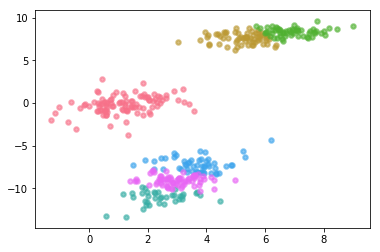

0.49269593361380565


In [104]:
import ssl
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, seed
from numpy import take, where, unique, concatenate
from sklearn.cluster import AffinityPropagation
seed(17)
g1 = multivariate_normal([1.3, 0.0], [[1, 0.4], [0.4, 1]], 100)
g2 = multivariate_normal([6.0, 8.0], [[1.2, 0.3], [0.3, 0.5]], 120)
g3 = multivariate_normal([3.0, -9.0], [[0.75, 0.6], [0.6, 2]],160)
x = concatenate((g1, g2, g3))
m = AffinityPropagation(damping = 0.9, convergence_iter = 30)
c = m.fit(x)
grupos = c.labels_
plt.clf()
plt.figure(1)
k = len(unique(grupos))
colores = sns.color_palette("husl", k)
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.6, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

En estos últimos dos experimentos que se realizaron, se intentó mover algunos de los parámetros presentaods con la idea de encontrar los valores que dieran una respuesta facil de interpretar, como pasó en la primer gráfica, pero la única que logró capturar más la atención fue esta final. En este caso se jugó con diferentes valores para la parte de 'multivariate_normal' y no importa que tan grande sea el primer número, ese cluster que se forma en la parte superior sigue siendo igual de separado de los otros de abajo. 

Esto puede significar el grupo de alumnos con buena calificación, y esos dos colores que se notan son los dos tipos de nivel de educación a los que llegaron sus padres. En el caso del cluster de en medio, su color se queda fijo y su tamaño de puntos también, por lo que supongo que se traduce a una educación promedio, tiene como resultado calificaciones promedio.

El último cluster representa un misterio, ya que algunas veces, aumentando los otros valores, este cambiaba de color también. 

En general, y con los resultados obtenidos puedo sacar como conclusión con estos datos que el nivel de educación que tienen los padres de los alumnos si afecta un poco en la calificación global que estos puedan obtener. La razón porque la diferencia sea tan pequeña en la primer gráfica, puede ser que el nivel académico no refleje el compromiso o la inteligencia de los padres, más sin embargo, los recursos disponibles por estas personas para poder completar sus estudios.